In [83]:
import numpy as np
import matplotlib.pyplot as plt
from rlxutils import subplots
%matplotlib inline

In [214]:
P_cancer = 0.01
P_nocancer = 1 - P_cancer
P_pos_given_cancer = 0.85
P_pos_given_nocancer = 0.05

P_neg_given_cancer = 1 - P_pos_given_cancer
P_neg_given_nocancer = 1 -  P_pos_given_nocancer

In [215]:
posterior = lambda P_B_given_A, P_A, P_B: P_B_given_A * P_A / P_B 

In [216]:
P_pos = P_pos_given_cancer * P_cancer + P_pos_given_nocancer * P_nocancer
P_neg = P_neg_given_cancer * P_cancer + P_neg_given_nocancer * P_nocancer
P_pos

0.058

In [217]:
P_pos_given_cancer , P_cancer , P_pos_given_nocancer , P_nocancer

(0.85, 0.01, 0.05, 0.99)

In [218]:
P_cancer_given_pos = posterior(P_pos_given_cancer, P_cancer, P_pos)
P_cancer_given_pos

0.14655172413793105

In [219]:
P_nocancer_given_pos = posterior(P_pos_given_nocancer, P_nocancer, P_pos)
P_nocancer_given_pos

0.853448275862069

In [220]:
P_neg = P_neg_given_cancer * P_cancer + P_neg_given_nocancer * P_nocancer

P_nocancer_given_neg = posterior(P_neg_given_nocancer, P_nocancer, P_neg)
P_nocancer_given_neg

0.998407643312102

In [221]:
0.85 * 0.147 / 0.1676

0.7455250596658711

## reduce FNR

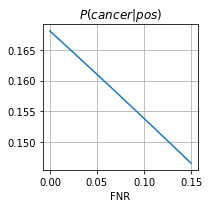

In [224]:
rP_pos_given_cancer = np.linspace(P_pos_given_cancer,1, 100)
rP_neg_given_cancer = 1 - rP_pos_given_cancer
P_pos = rP_pos_given_cancer * P_cancer + P_pos_given_nocancer * P_nocancer
P_neg = rP_neg_given_cancer * P_cancer + P_neg_given_nocancer * P_nocancer


for ax,i in subplots(1):

    if i==0:
        plt.plot(rP_neg_given_cancer, posterior(rP_pos_given_cancer, P_cancer, P_pos))
        plt.grid();
        plt.title("$P(cancer|pos)$");
        plt.xlabel("FNR")
        
    if i==1:
        plt.plot(rP_neg_given_cancer, posterior(rP_neg_given_cancer, P_cancer, P_neg))
        plt.grid();
        plt.title("$P(cancer|neg)$");
        plt.xlabel("FNR")
        
plt.tight_layout()

## reduce FPR

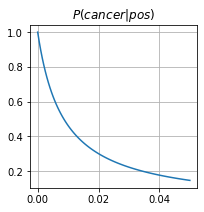

In [225]:
for ax,i in subplots(1):
    xr = np.linspace(0,P_pos_given_nocancer,100)
    rP_pos_given_nocancer = xr
    P_pos = P_pos_given_cancer * P_cancer + rP_pos_given_nocancer * P_nocancer
    plt.plot(rP_pos_given_nocancer, posterior(P_pos_given_cancer, P_cancer, P_pos))
    plt.grid();
    plt.title("$P(cancer|pos)$");

if the incidence of cancer if very high, reducing FNR is far more important

In [61]:
P_cancer = 0.8
P_nocancer = 1 - P_cancer
P_pos_given_cancer = 0.85
P_pos_given_nocancer = 0.05

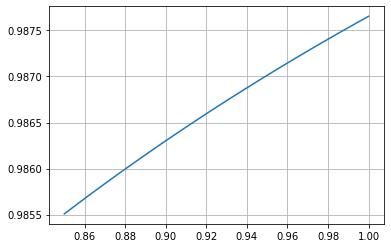

In [64]:
xr = np.linspace(0,1-P_pos_given_cancer,100)
rP_pos_given_cancer = 1 - xr
P_pos = rP_pos_given_cancer * P_cancer + P_pos_given_nocancer * P_nocancer
plt.plot(rP_pos_given_cancer, posterior(rP_pos_given_cancer, P_cancer, P_pos))
plt.grid();

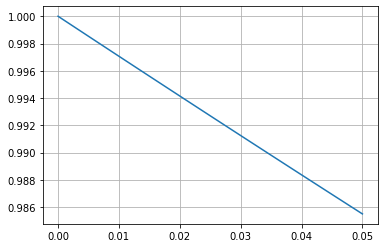

In [63]:
xr = np.linspace(0,P_pos_given_nocancer,100)
rP_pos_given_nocancer = xr
P_pos = P_pos_given_cancer * P_cancer + rP_pos_given_nocancer * P_nocancer
plt.plot(rP_pos_given_nocancer, posterior(P_pos_given_cancer, P_cancer, P_pos))
plt.grid();